# Capstone Project Part I: Gathering and Cleaning Data
### By Seshagiri Sriram

The full report and problem summary can be found [here](./ProjectReport.md).

In [1]:
!pip install --upgrade pandas 
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn

# Map rendering library
import folium

Requirement already up-to-date: pandas in d:\apps\python38\lib\site-packages (1.1.1)


In [2]:
apt_rentals = pd.read_csv("./Datasets/Toronto_apartment_rentals_2018.csv")

In [3]:
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


## Lets take a look at our data with a map

In [4]:
def generate_map(dataframe, longitude, latitude):
        map = folium.Map(location=[latitude, longitude], zoom_start=11)

        # add markers to map
        for lat, lng, apt, price in zip(dataframe['Lat'], dataframe['Long'], dataframe['Address'], dataframe['Price']):
            label = '{}, {}'.format(price, apt)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map)  
            
        return map

In [5]:
latitude = 43.72
longitude = -79.347

# create map of New York using latitude and longitude values
map_neighborhoods = generate_map(apt_rentals, longitude, latitude)
map_neighborhoods

Data is nicely spread in the Toronto Area, as well as the surrounding cities.T here are some outliers though as we have a few properies in Calgary, Montreal, and some in Saskatchewan. We will focus on Ontario and remove these outliers in subsequent steps. 

## Extract the Price as a number (instead of a string)

In [6]:
# Remove '$' Character
apt_rentals['Price'] = apt_rentals['Price'].str.replace('$', '')

# Remove Comma's
apt_rentals['Price'] = apt_rentals['Price'].str.replace(',', '')

# Convert to Number
apt_rentals['Price'] = pd.to_numeric(apt_rentals['Price'])
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


In [7]:
# Remove the rent outliers from our prices
apt_rentals = apt_rentals[apt_rentals['Price'] < 6000]

## Remove Datapoints Outside of Ontario

In [8]:
# Get Calgary, Montréal, and the postal code for the SK datapoint
out_of_province = apt_rentals[apt_rentals['Address'].str.contains('Calgary|Montréal|M4Y0C4|M5B0A5')]
out_of_province.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
270,3,2.0,0,"M5B0A5, Canada",56.130366,-106.346771,4000.0
401,3,2.0,0,"M5B0A5, Canada",56.130366,-106.346771,4000.0
942,2,1.0,0,"1280 Rue Saint-Marc, Montréal, QC H3H 2G1, Canada",45.492511,-73.580293,1475.0
985,1,1.5,0,"3600 Av du Parc, Montréal, QC H2X 2J1, Canada",45.510566,-73.576385,1953.0
1023,1,1.0,1,"M4Y0C4, Canada",56.130366,-106.346771,1830.0


In [9]:
# Drop them
apt_rentals.drop(out_of_province.index.values, axis=0, inplace=True)

# Fix the indices
apt_rentals.reset_index(drop=True)
apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


## Extract the Postal Code from each address

In [10]:
# Remove Numbers prefixed or postfixed by a space
apt_rentals['Address'] = apt_rentals['Address'].str.replace('\d+\s', '')
apt_rentals['Address'] = apt_rentals['Address'].str.replace('\s\d+', '')
apt_rentals['Address'].head()

0    Grand Park Drive, Grand Park Dr, Mississauga, ...
1                Front St W, Toronto, ON M5VR5, Canada
2                    McGill Street, Toronto, ON, M5BB1
3                      York Street, Toronto, ON, M5JE1
4             St Patrick St, Toronto, ON M5TX6, Canada
Name: Address, dtype: object

In [11]:
# Remove Words that have no numbers (Postal Codes are in the format A1A 1A1)
apt_rentals['Address'] = apt_rentals['Address'].str.replace(r'\b[^\d\W]+\b', '')

# Remove Any Extraneous Characters (#!$ spaces, newlines... etc)
apt_rentals['Address'] = apt_rentals['Address'].str.replace('[^a-zA-Z0-9]', '')

# Focus on the first three characters of the address
apt_rentals['Address'] = apt_rentals['Address'].str[:3]

apt_rentals.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,L5B,43.581639,-79.648193,2450.0
1,1,1.0,1,M5V,43.643051,-79.391643,2150.0
2,1,1.0,0,M5B,43.660605,-79.378635,1950.0
3,2,2.0,0,M5J,43.641087,-79.381405,2900.0
4,1,1.0,0,M5T,43.652487,-79.389622,1800.0


## Label the Neighborhood Names Using List of Toronto Postal Codes

In [12]:
# Note this removes all the data points outside of Toronto
neighborhoods = pd.read_csv('toronto_merged.csv')
neighborhoods = neighborhoods[['Postal Code', 'Neighborhood', 'Borough']]
neighborhoods.head()

,Postal Code,Neighborhood,Borough
0,M4E,The Beaches,East Toronto
1,M4K,"The Danforth West,Riverdale",East Toronto
2,M4L,"The Beaches West,India Bazaar",East Toronto
3,M4M,Studio District,East Toronto
4,M4N,Lawrence Park,Central Toronto


In [13]:
merge = pd.merge(apt_rentals, neighborhoods, left_on='Address', right_on='Postal Code')
merge.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Postal Code,Neighborhood,Borough
0,1,1.0,1,M5V,43.643051,-79.391643,2150.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
1,1,1.0,0,M5V,43.640918,-79.393982,1900.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
2,1,1.0,0,M5V,43.641308,-79.400093,1900.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
3,1,1.0,1,M5V,43.640068,-79.399960,2400.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto
4,1,1.0,0,M5V,43.647627,-79.390408,2650.0,M5V,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Downtown Toronto


## Data Exploration

Text(0, 0.5, 'Count')

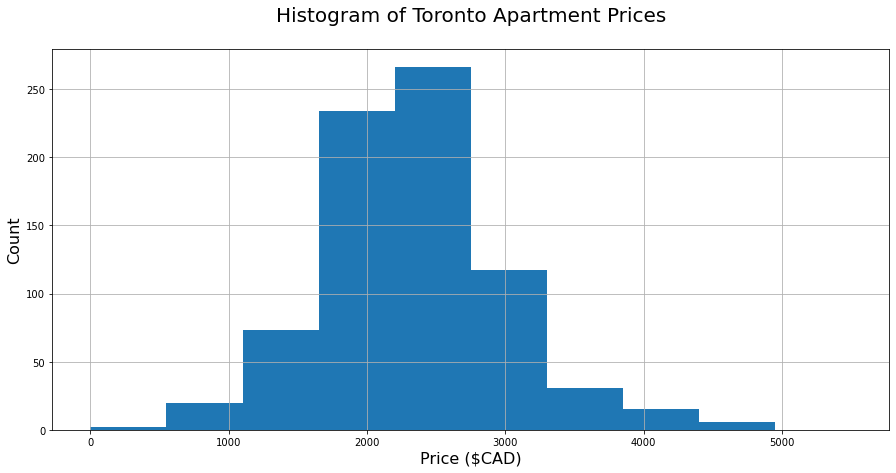

In [14]:
# Price Histogram
price_histogram = merge['Price'].hist(range=(0, 5500), figsize=(15,7))
price_histogram.set_title('Histogram of Toronto Apartment Prices\n', fontsize=20)
price_histogram.set_xlabel('Price ($CAD)', fontsize=16)
price_histogram.set_ylabel('Count', fontsize=16)

### Our distribution fits nicely (mostly) in bell curve, although a little oriented towards the right. 

# Guiding Question: What effect do nearby businesses have on the apartment price.

## Grab Venues Close by each Apartment

In [36]:
# @hidden_cell
import requests
# FOURSQUARE API CREDENTIALS
CLIENT_ID = 'W1FBWBWOFHXJ1EMXXPHHAI0BQ2WVPBMJ5DR0JYN0NS0RLDUT' # your Foursquare ID
CLIENT_SECRET = 'HDPUURYRYVU1DXI0MUW2EAHZHEQ52BJXIQCW3JDRVJ55WEFA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [37]:
apt_latitude = merge.loc[0, 'Lat'] # neighborhood latitude value
apt_longitude = merge.loc[0, 'Long'] # neighborhood longitude value

neighborhood_name = merge.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               apt_latitude, 
                                                               apt_longitude))

Latitude and longitude values of CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara are 43.6430505, -79.3916429.


In [38]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    apt_latitude, 
    apt_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5N1I2ZBKG55NFLJQELOZI3XTLBUXXCF3FKTJQSZ2WXPZBWR5&client_secret=P5MPRQBUI4MRPYUYQHFHDT0CWEF3D3U1WTKBGKGTK0VXAIBU&v=20180605&ll=43.6430505,-79.3916429&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4ca5b4ec297935bfd0e710'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Entertainment District',
  'headerFullLocation': 'Entertainment District, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 78,
  'suggestedBounds': {'ne': {'lat': 43.6475505045, 'lng': -79.38543605859854},
   'sw': {'lat': 43.6385504955, 'lng': -79.39784974140144}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b15b075f964a52098b223e3',
       'name': 'Residence Inn Toronto Downtown/Entertainment District',
       'location': {'address': '255 Wellington Street West',
        'crossStreet': 'at Windsor St.',
        'lat': 43.64475176176148,
 

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files
print ('imported json');

imported json


In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Residence Inn Toronto Downtown/Entertainment D...,Hotel,43.644752,-79.390727
1,The Second City,Comedy Club,43.645633,-79.391225
2,WestJet Flight Deck,Baseball Stadium,43.641038,-79.389092
3,Akira Back,Japanese Restaurant,43.645376,-79.392063
4,Bar Hop,Beer Bar,43.645603,-79.393583


In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng); 
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
toronto_venues = getNearbyVenues(names=merge['Borough'],
                                   latitudes=merge['Lat'],
                                   longitudes=merge['Long']
                                  )

Downtown Toronto 43.6430505 -79.3916429
Downtown Toronto 43.6409179 -79.3939821
Downtown Toronto 43.6413078 -79.4000933
Downtown Toronto 43.6400685 -79.39996040000001
Downtown Toronto 43.647627299999996 -79.39040809999999
Downtown Toronto 43.6394055 -79.3932324
Downtown Toronto 43.648005299999994 -79.3968338
Downtown Toronto 43.6489727 -79.3872946
Downtown Toronto 43.647870000000005 -79.391138
Downtown Toronto 43.6394055 -79.3932324
Downtown Toronto 43.6489727 -79.3872946
Downtown Toronto 43.6489001 -79.392205
Downtown Toronto 43.6394055 -79.3932324
Downtown Toronto 43.6402232 -79.395951
Downtown Toronto 43.643207700000005 -79.39211
Downtown Toronto 43.647870000000005 -79.391138
Downtown Toronto 43.6430505 -79.3916429
Downtown Toronto 43.6489727 -79.3872946
Downtown Toronto 43.6469441 -79.3923973
Downtown Toronto 43.6489727 -79.3872946
Downtown Toronto 43.6394055 -79.3932324
Downtown Toronto 43.6430505 -79.3916429
Downtown Toronto 43.640402 -79.39714670000001
Downtown Toronto 43.647870

Downtown Toronto 43.6476244 -79.3968608
Downtown Toronto 43.645641 -79.39295340000001
Downtown Toronto 43.6381439 -79.39751
Downtown Toronto 43.6465801 -79.3998612
Downtown Toronto 43.6375235 -79.40087700000001
Downtown Toronto 43.6476244 -79.3968608
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6548421 -79.37920150000001
Downtown Toronto 43.660846 -79.3787556
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6548421 -79.37920150000001
Downtown Toronto 43.660846 -79.3787556
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.6606054 -79.37863540000001
Downtown Toronto 43.660269 -79.38280019999999
Downtown Toronto 43.660269 -79.38280019999999
Downtown Toront

West Toronto 43.640845500000005 -79.4143193
West Toronto 43.638700299999996 -79.4121833
West Toronto 43.648857799999995 -79.4330072
West Toronto 43.6403508 -79.42752159999999
West Toronto 43.6403508 -79.42752159999999
West Toronto 43.640845500000005 -79.4143193
West Toronto 43.638700299999996 -79.4121833
West Toronto 43.63982539999999 -79.4122306
West Toronto 43.64027720000001 -79.4241261
West Toronto 43.634354200000004 -79.4352696
West Toronto 43.63828839999999 -79.4360532
West Toronto 43.6356261 -79.4268735
West Toronto 43.64027720000001 -79.4241261
West Toronto 43.6398173 -79.43737970000001
West Toronto 43.6391261 -79.41922209999998
West Toronto 43.638306799999995 -79.4147858
West Toronto 43.6474943 -79.43599499999999
West Toronto 43.6398173 -79.43737970000001
West Toronto 43.6367119 -79.4206384
West Toronto 43.6403508 -79.42752159999999
West Toronto 43.638399299999996 -79.41444820000001
West Toronto 43.636538200000004 -79.41931
West Toronto 43.6359631 -79.43574890000001
West Toront

Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.6485726 -79.37627540000001
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6485726 -79.37627540000001
Downtown Toronto 43.6441737 -79.3894209
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6485726 -79.37627540000001
Downtown Toronto 43.6441737 -79.3894209
Downtown Toronto 43.6493806 -79.37453190000001
Downtown Toronto 43.6485726 -79.37627540000001
Downtown Toronto 43.644408399999996 -79.37656170000001
Downtown Toronto 43.64310510000001 -79.375906
Downtown Toronto 43.6458091 -79.3756819
Downtown Toronto 43.6460983 

East Toronto 43.680601700000004 -79.2893327
East Toronto 43.6777793 -79.28619309999999
Central Toronto 43.707319700000006 -79.4002252
Downtown Toronto 43.652812 -79.3733062
Downtown Toronto 43.6521506 -79.3754775
Downtown Toronto 43.6490882 -79.3762537
Downtown Toronto 43.6535202 -79.37377020000001
Downtown Toronto 43.650324100000006 -79.3779693
Downtown Toronto 43.649066499999996 -79.37693
Central Toronto 43.69840429999999 -79.3948245
Central Toronto 43.717321000000005 -79.42485


In [51]:
print(toronto_venues.shape)
toronto_venues.head()

(75059, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,43.643051,-79.391643,WestJet Flight Deck,43.641038,-79.389092,Baseball Stadium
1,Downtown Toronto,43.643051,-79.391643,The Second City,43.645633,-79.391225,Comedy Club
2,Downtown Toronto,43.643051,-79.391643,CN Tower,43.642536,-79.387182,Monument / Landmark
3,Downtown Toronto,43.643051,-79.391643,Sky Pod,43.642561,-79.387038,Scenic Lookout
4,Downtown Toronto,43.643051,-79.391643,Steam Whistle Brewing,43.641752,-79.387089,Brewery


In [52]:
# Save to CSV File
toronto_venues.to_csv("venuesX.csv")

In [54]:
apt_rentals.to_csv("apt_rentals_clean.csv")
merge.to_csv("apt_rentals_X_neighborhood.csv")